In [1]:
from google.colab import files
#uploaded = files.upload()
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread,imshow
import math
from scipy.signal import convolve2d
from skimage.io import imread,imsave,imshow
import random


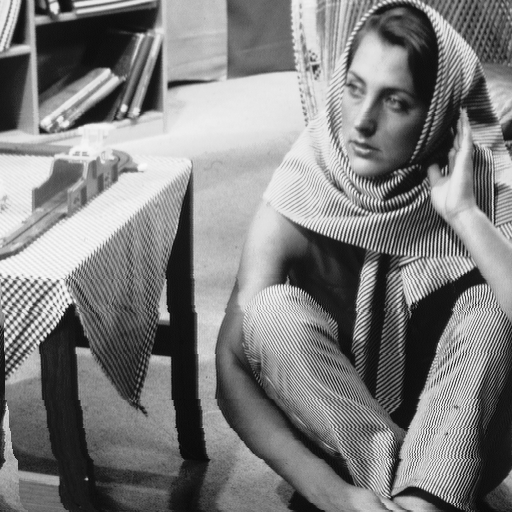

In [2]:
im = cv2.imread('barbara_gray.png',0)
cv2_imshow(im)

In [3]:
#Noisy Function:
def create_blank_image(m, n):
    return np.zeros((m, n), dtype=np.uint8)

def add_noise(im, param):
    m, n = im.shape
    total = m * n

    noisy_im = create_blank_image(m, n)# this line is used to create a blank image of size m*n

    for i in range(m):
        for j in range(n):
            noisy_im[i, j] = im[i, j]# this line is used to copy the image into the blank image

    for _ in range(param * total // 200):
        x = random.randint(0, m - 1)# this line is used to generate random number between 0 and m-1
        y = random.randint(0, n - 1)# this line is used to generate random number between 0 and n-1
        noisy_im[x, y] = 255# this line is used to add noise to the image

    for _ in range(param * total // 200):
        x = random.randint(0, m - 1)# this line is used to generate random number between 0 and m-1
        y = random.randint(0, n - 1)# this line is used to generate random number between 0 and n-1
        noisy_im[x, y] = 0

    return noisy_im

'def create_blank_image(m, n):\n    return np.zeros((m, n), dtype=np.uint8)\n\ndef add_noise(im, param):\n    m, n = im.shape\n    total = m * n\n\n    noisy_im = create_blank_image(m, n)\n\n    for i in range(m):\n        for j in range(n):\n            noisy_im[i, j] = im[i, j]\n\n    for _ in range(param * total // 200):\n        x = random.randint(0, m - 1)\n        y = random.randint(0, n - 1)\n        noisy_im[x, y] = 255\n\n    for _ in range(param * total // 200):\n        x = random.randint(0, m - 1)\n        y = random.randint(0, n - 1)\n        noisy_im[x, y] = 0\n\n    return noisy_im'

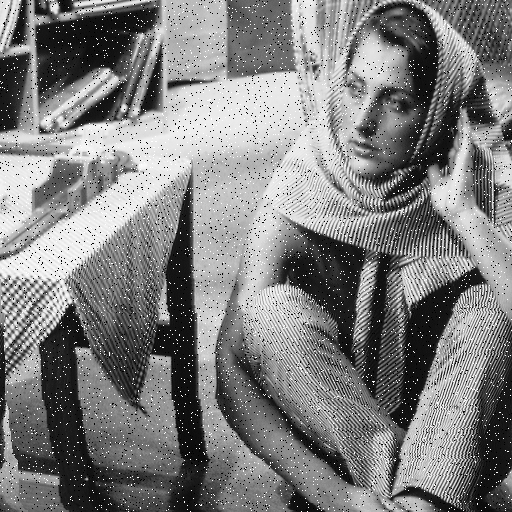

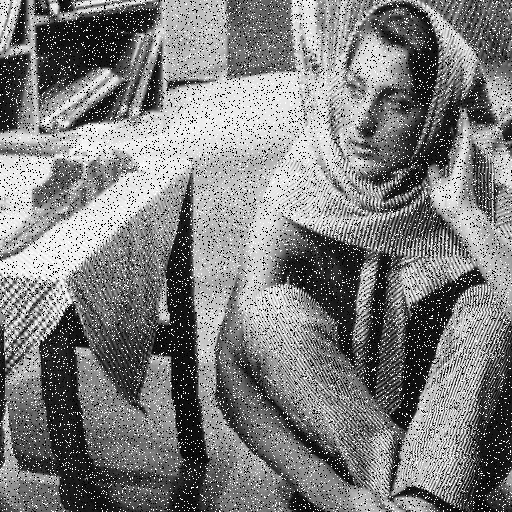

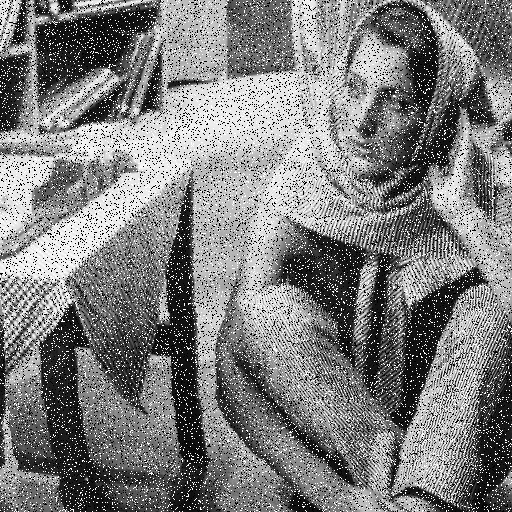

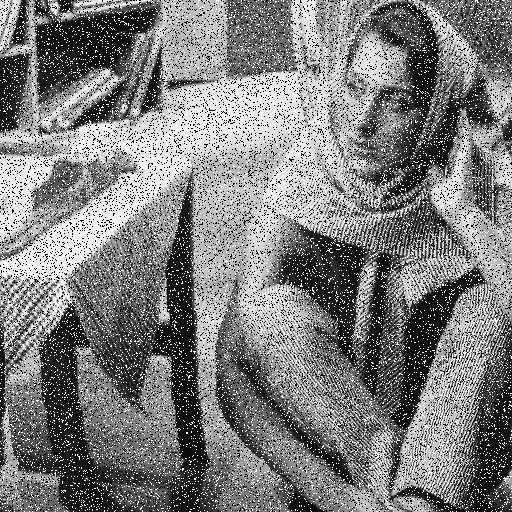

In [4]:
#5% Corruption
output1=add_noise(im,5)
cv2_imshow(output1)
#15% Corruption
output2=add_noise(im,15)
cv2_imshow(output2)
#20% Corruption
output3=add_noise(im,20)
cv2_imshow(output3)
#25% Corruption
output4=add_noise(im,25)
cv2_imshow(output4)

In [6]:
# 3x3 Median Filter:
def generate_output_image(noised_img):
    row, col = noised_img.shape
    output_img = np.zeros([row, col], dtype=np.uint8)
    return output_img

def median_3(noised_img):
    row, col = noised_img.shape
    output_img = generate_output_image(noised_img)# this line is used to generate output image
    
    for i in range(1, row - 1):
        for j in range(1, col - 1):
           neighborhood = []
           for k in range(-1, 2):
            for l in range(-1, 2):
                neighborhood.append(noised_img[i + k, j + l])# this line is used to append the neighborhood values to the list
            neighborhood = sorted(neighborhood)# this line is used to sort the neighborhood values
            output_img[i, j] = neighborhood[4]  # Median value

    return output_img



'def generate_output_image(noised_img):\n    row, col = noised_img.shape\n    output_img = np.zeros([row, col], dtype=np.uint8)\n    return output_img\n\ndef median_3(noised_img):\n    row, col = noised_img.shape\n    output_img = generate_output_image(noised_img)\n\n    for i in range(1, row - 1):\n        for j in range(1, col - 1):\n            neighborhood = [\n                noised_img[i - 1, j - 1],\n                noised_img[i - 1, j],\n                noised_img[i - 1, j + 1],\n                noised_img[i, j - 1],\n                noised_img[i, j],\n                noised_img[i, j + 1],\n                noised_img[i + 1, j - 1],\n                noised_img[i + 1, j],\n                noised_img[i + 1, j + 1]\n            ]\n            neighborhood = sorted(neighborhood)\n            output_img[i, j] = neighborhood[4]  # Median value\n\n    return output_img'

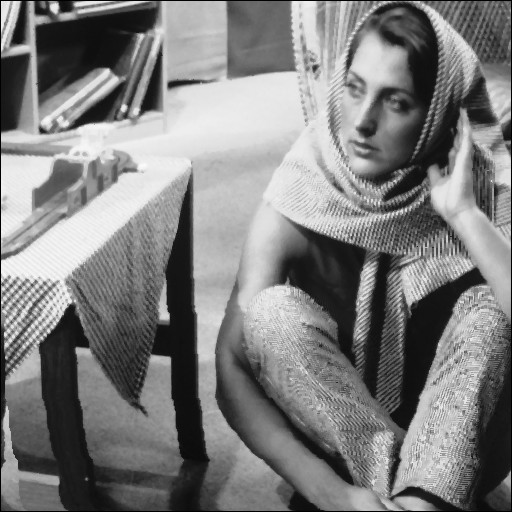

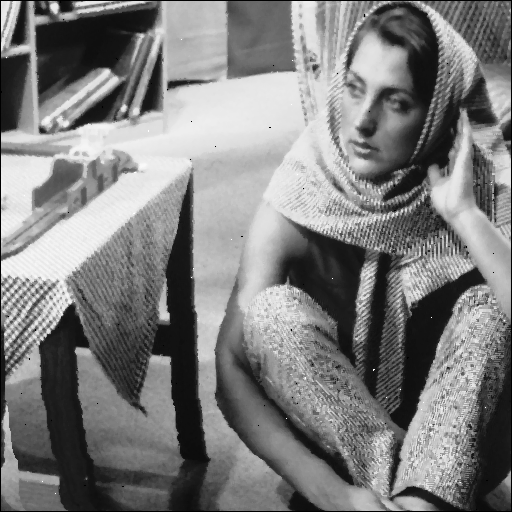

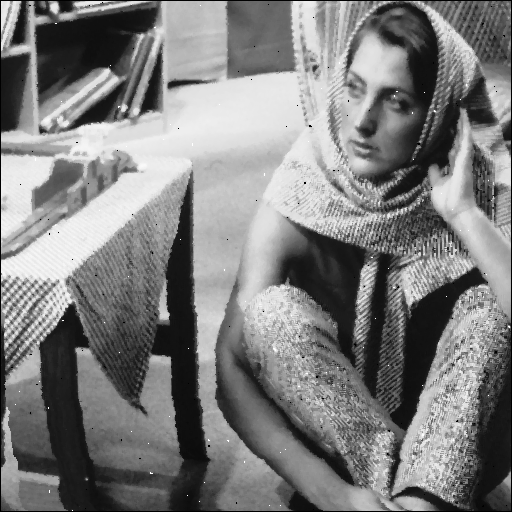

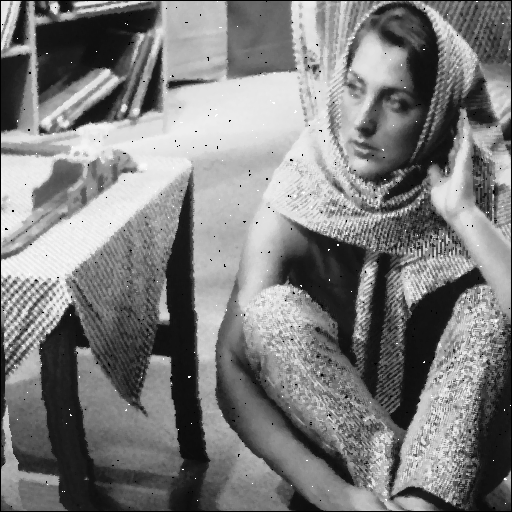

In [7]:
#Result 1
result1=median_3(output1)
cv2_imshow(result1)
#Result 2
result2=median_3(output2)
cv2_imshow(result2)
#Result 3
result3=median_3(output3)
cv2_imshow(result3)
#Result 4
result4=median_3(output4)
cv2_imshow(result4)

In [8]:
def generate_output_image(input_img):
    row, col = input_img.shape
    output_img = np.zeros([row, col], dtype=np.uint8)
    return output_img

def median_5(input_img):
    row, col = input_img.shape
    output_img = generate_output_image(input_img)

    for i in range(2, row - 2):
        for j in range(2, col - 2):
            neighborhood = []
            for k in range(-2, 3):
                for l in range(-2, 3):
                    neighborhood.append(input_img[i + k, j + l])
            neighborhood = sorted(neighborhood)
            output_img[i, j] = neighborhood[12]  # Median value

    return output_img



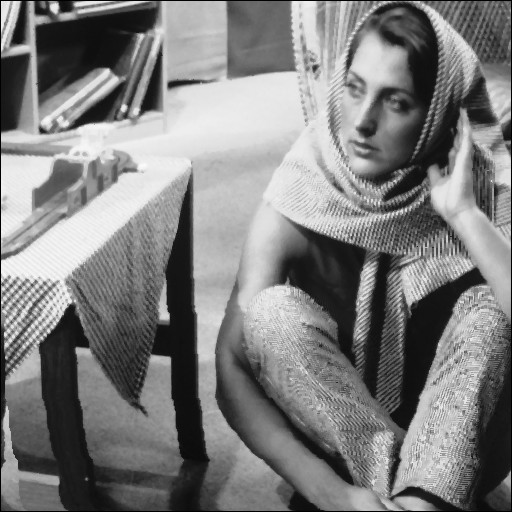

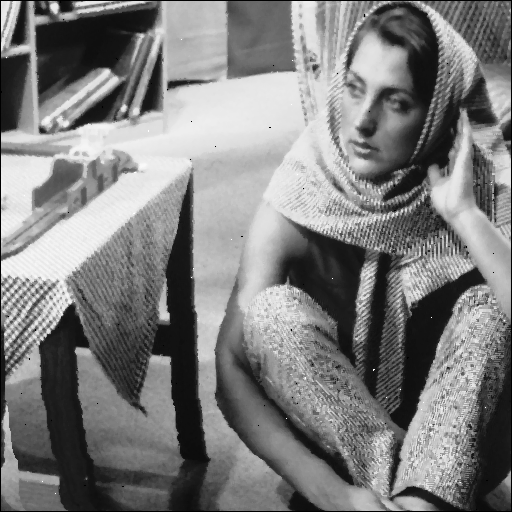

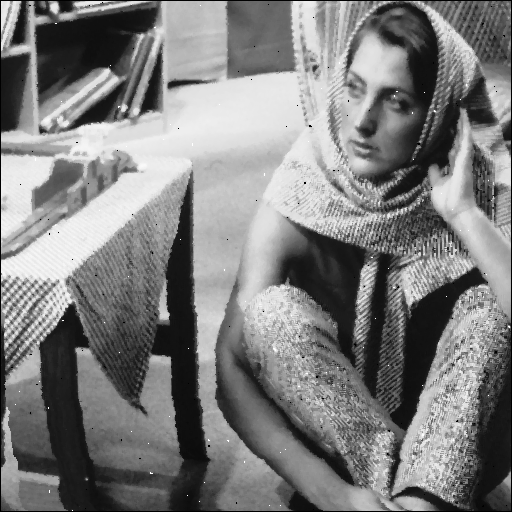

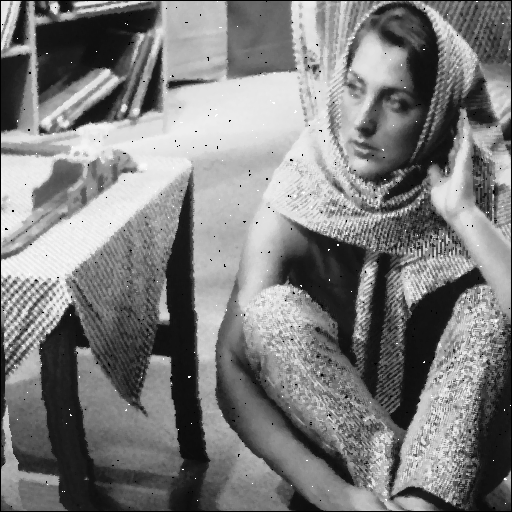

In [9]:
#Result 1
result1_5=median_5(output1)
cv2_imshow(result1)
#Result 2
result2_5=median_5(output2)
cv2_imshow(result2)
#Result 3
result3_5=median_5(output3)
cv2_imshow(result3)
#Result 4
result4_5=median_5(output4)
cv2_imshow(result4)

In [10]:
# PSNR
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [11]:
print(PSNR(im,result1))
print(PSNR(im,result2))
print(PSNR(im,result3))
print(PSNR(im,result4))

21.194833114379122
20.72134073206908
20.367720233449674
19.90394252442209


In [12]:
print(PSNR(im,result1_5))
print(PSNR(im,result2_5))
print(PSNR(im,result3_5))
print(PSNR(im,result4_5))

31.51045849427231
31.40392272314529
31.350162946391702
31.291889784571755
